In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
airports=pd.read_csv('../datasets/airport2.csv')

In [4]:
airports.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2009.000000,2373.818182,2633.272727,346.363636,322.363636
std,3.211308,3451.760741,3777.133671,390.555439,408.420572
min,2004.000000,111.000000,162.000000,61.000000,26.000000
25%,2006.000000,232.000000,235.000000,73.000000,37.000000
50%,2009.000000,359.000000,355.000000,84.000000,54.000000
75%,2012.000000,5324.000000,6303.000000,790.000000,655.000000
max,2014.000000,13837.000000,14480.000000,1064.000000,1116.000000


In [5]:
airports

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42
5,ABQ,2009,192,162,74,26
6,ABQ,2010,222,177,71,50
7,ABQ,2011,345,294,77,61
8,ABQ,2012,237,181,65,60
9,ABQ,2013,232,212,62,46


In [17]:
y=airports.Airport
x=airports.drop('Airport', axis=1)

In [7]:
y.value_counts()

ANC    11
ATL    11
ABQ    11
Name: Airport, dtype: int64

In [34]:
y=y.apply(lambda x: 1 if x=='ANC' else 2 if x=='ATL' else 3)

In [10]:
y.value_counts()

3    11
2    11
1    11
Name: Airport, dtype: int64

In [11]:
airports.Year.value_counts()

2014    3
2013    3
2012    3
2011    3
2010    3
2009    3
2008    3
2007    3
2006    3
2005    3
2004    3
Name: Year, dtype: int64

In [20]:
x=pd.concat([x, pd.get_dummies(x.Year, prefix='year')], axis=1).drop('Year', axis=1)

In [21]:
x

,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014
0,242,235,71,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,221,190,61,33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,392,329,71,124,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,366,304,107,45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,333,300,79,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,192,162,74,26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,222,177,71,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,345,294,77,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,237,181,65,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,232,212,62,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
x.dtypes

Departure Cancellations      int64
Arrival Cancellations        int64
Departure Diversions         int64
Arrival Diversions           int64
year_2004                  float64
year_2005                  float64
year_2006                  float64
year_2007                  float64
year_2008                  float64
year_2009                  float64
year_2010                  float64
year_2011                  float64
year_2012                  float64
year_2013                  float64
year_2014                  float64
dtype: object

In [37]:
def plot_graph(x, y, title):
    plt.scatter(x, y)
    plt.title(title)
    plt.show()

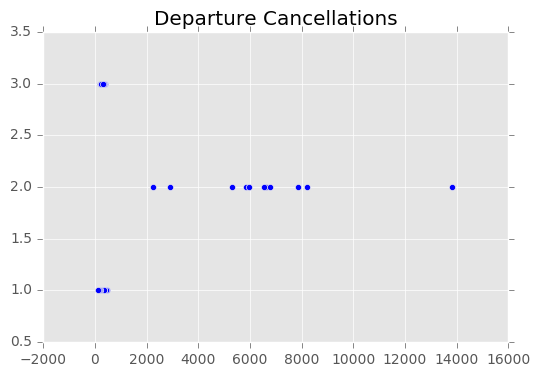

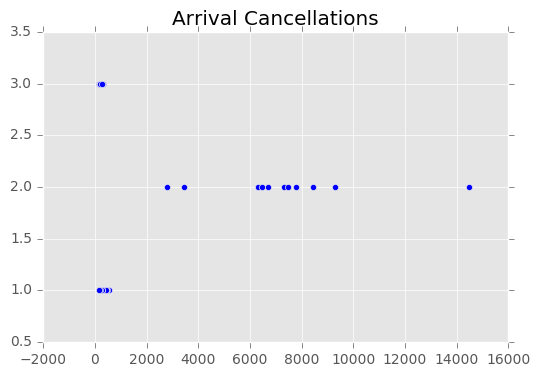

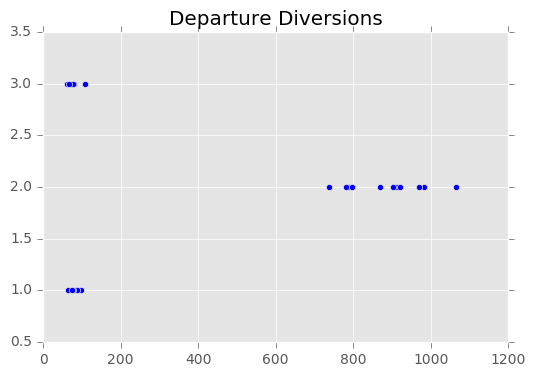

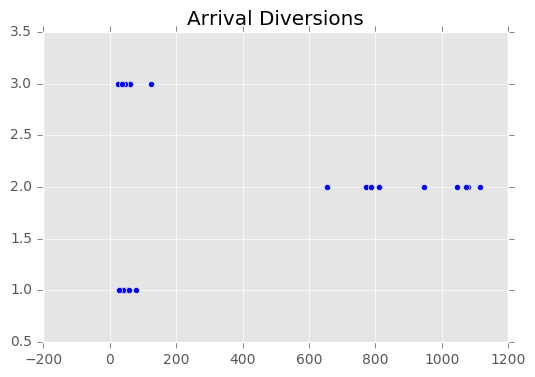

In [39]:
for col in x.columns[0:4]:
    plot_graph(x[col], y, col)

In [40]:
import seaborn as sns

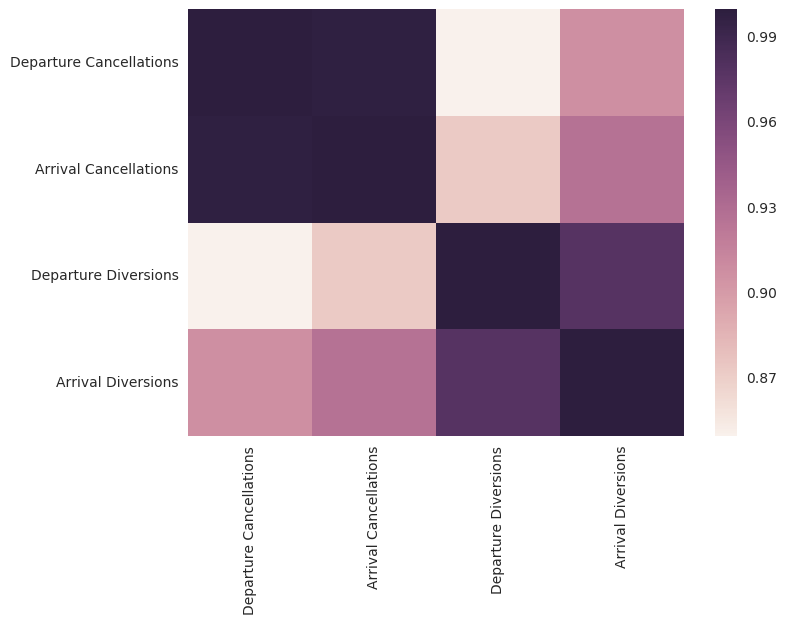

In [57]:
sns.heatmap(x.ix[:,0:4].corr())

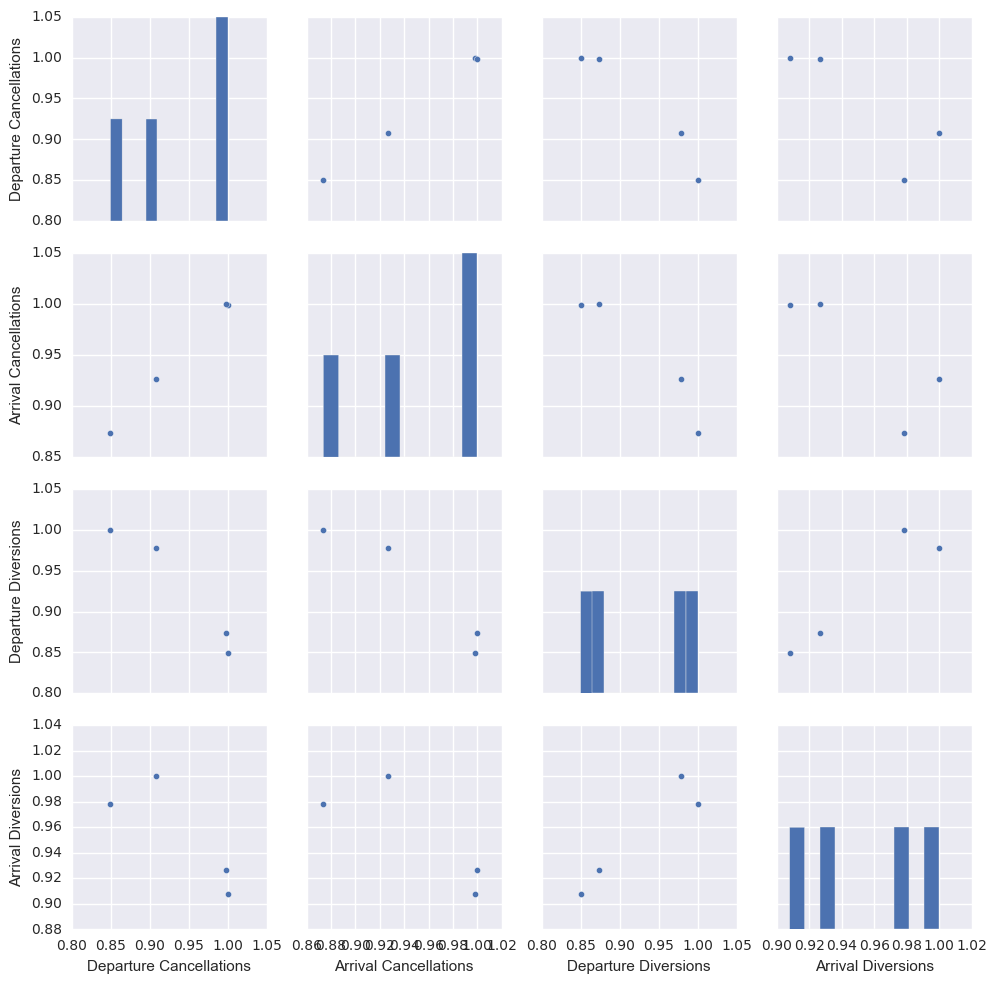

In [58]:
sns.pairplot(x.ix[:,0:4].corr())

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [47]:
x_standard=StandardScaler().fit_transform(x)
x.shape

(33, 15)

In [48]:
kmeans = KMeans(3)
kmeans.fit(x_standard)
predictions=kmeans.predict(x_standard)

In [52]:
x=x.join(pd.DataFrame(predictions, columns=['three_class']))

In [53]:
x

,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,three_class
0,242,235,71,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,221,190,61,33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,392,329,71,124,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,366,304,107,45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,333,300,79,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,192,162,74,26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,222,177,71,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7,345,294,77,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
8,237,181,65,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
9,232,212,62,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
